# Karger's Algorithm

The goal of the algorithm is to find a global min-cut. The graph is undirected and allows parallel edges.
The algorithm chooses an edge randomly and contracts it. The procedure is performed recursively until two nodes remain.

In [2]:
import random 
random.seed = 420
import copy
from time import time
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

In [3]:
def Krager_backup(graph):
    while len(graph) > 2:
        v, w = getRandomEdge(graph)
        contract(graph, v, w)
        show(graph)
    return len(graph[list(graph.keys())[0]])

In [70]:
def Krager(graph, show_graph=False):
    if show_graph:
        print("initital  graph")
        plt.figure(figsize=(20,10))
        show(graph)
        plt.show()
    while len(graph) > 2:
        v, w = getRandomEdge(graph)
        contract(graph, v, w)
        if show_graph:
            print("Merged", w , "with", v)
            plt.figure(figsize=(20,10))
            show(graph)
            plt.show()
    if show_graph:
        print("final graph")
        plt.figure(figsize=(20,10))
        show(graph)
        plt.show()
    return len(graph[list(graph.keys())[0]])

In [71]:
def getRandomEdge(graph):
    flag = True
    while flag:
        v = random.choice(list(graph.keys()))
        if graph[v] :
            w = random.choice(graph[v])
            flag = False
    return (v,w)

In [72]:
def contract(graph, v, w):
    for node in graph[w]:
        if node != v:
            graph[v].append(node)
        graph[node].remove(w)
        if node != v:
            graph[node].append(v)
    del graph[w]

In [73]:
def show(graph):
    G = nx.from_dict_of_lists(graph)
    return nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)


In [74]:
import pandas as pd
def show_sample(graph, hv=None,hu=None):
    source = []
    destination = []
    colour = []
    for u in graph:
        for v in graph[u]:
            source.append(u)
            destination.append(v)
            if v is not None and u is not None:
                if (u==hu and v == hv) or  (u==hv and v==hu):
                    colour.append("10")
                else:
                    colour.append("5")
            else:
                colour.append("5")
    df = pd.DataFrame({"from":source, "to":destination, "value":colour})
    G = nx.from_pandas_edgelist(df, 'from', 'to',['value'], create_using=nx.Graph() )
    nx.draw(G,
            with_labels=True,
            node_color='skyblue',
            node_size=1500,
            edge_color=colour,
            width=10.0, 
            edge_cmap=plt.cm.Blues)
    plt.show()

In [75]:
def readGraphFromFile(filename):
    graph = {}
    file = open(filename)
    for line in file:
        edges = []
        line = line.split()
        line = [int(x) for x in line]
        graph[int(line[0])] = line[1:]
    print(str(len(graph)) + " vertices in dictionary.")
    return graph

In [76]:
iterations = 10
graph = readGraphFromFile('kargerMinCut.txt')

200 vertices in dictionary.


In [77]:
def find_min_cut(graph, iterations,show=False):
    cuts = []
    times = []
    for i in range(iterations):
        copiedGraph = copy.deepcopy(graph)
        start = time()
        mincut = Krager(copiedGraph,show)
        end = time()
        cuts.append(mincut)
        times.append(end-start)
    print("MinCut is " + str(min(cuts)))
    print("Total time taken: {}s, avg time: {}s ".format(sum(times),sum(times)/len(times)))
    return cuts, times
    

In [78]:
cuts, times = find_min_cut(graph,iterations)

MinCut is 17
Total time taken: 0.5705931186676025s, avg time: 0.057059311866760255s 


In [79]:
def get_random_graph(V,E):
    vertices  = [i for i in range(V)]
    graph = {i:[] for i in vertices}
    count = 0
    while count < E:
        u = random.choice(vertices)
        v = random.choice(vertices)
        if u == v:
            pass
        else:
            if v in graph[u]:
                pass
            else:
                graph[u].append(v)
                graph[v].append(u)
                count +=1
    return graph

In [80]:
graph= get_random_graph(4,4)

In [84]:
find_min_cut(graph,1000)

MinCut is 1
Total time taken: 0.013397216796875s, avg time: 1.3397216796875e-05s 


([2,
  2,
  2,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  2,
  1,
  2,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,


# Analysis

## Algorithm Complexity

## Convergence complexity

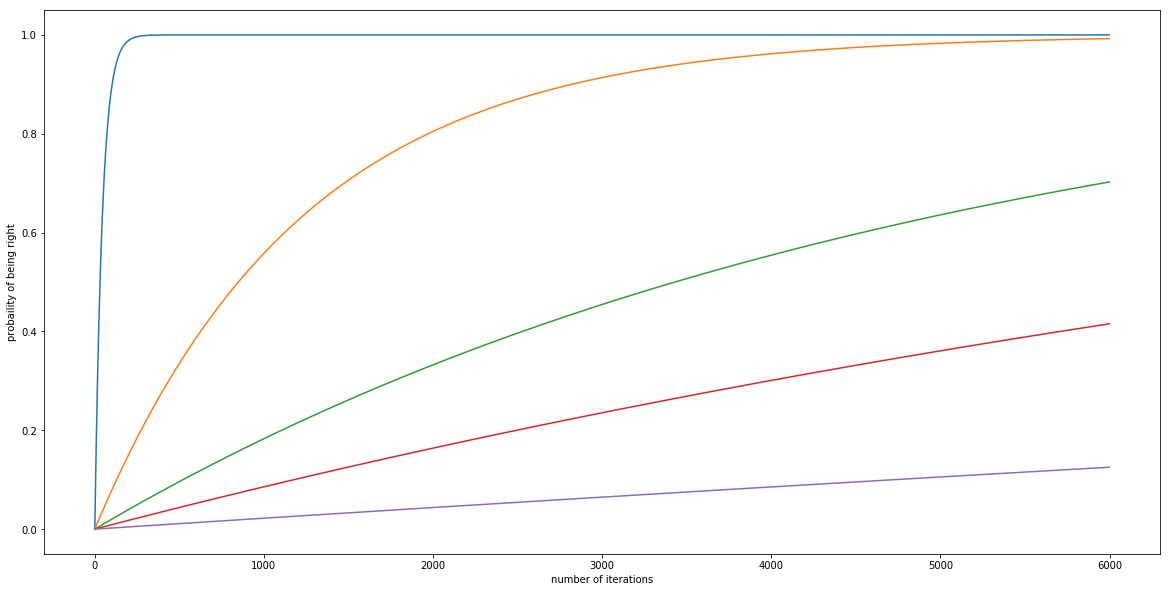

In [10]:
def get_probabilities(n, number_of_iterations):
    p = []
    for i in range(0,number_of_iterations):
        p.append(1-(1-(2/(n*(n-1))))**i)
    return p
probs = {}
plt.figure(figsize=(20,10))
for i in [10,50,100,150,300]:
    plt.xlabel("number of iterations")
    plt.ylabel("probaility of being right")
    probs[i]= get_probabilities(i, 6000)
    plt.plot(probs[i])

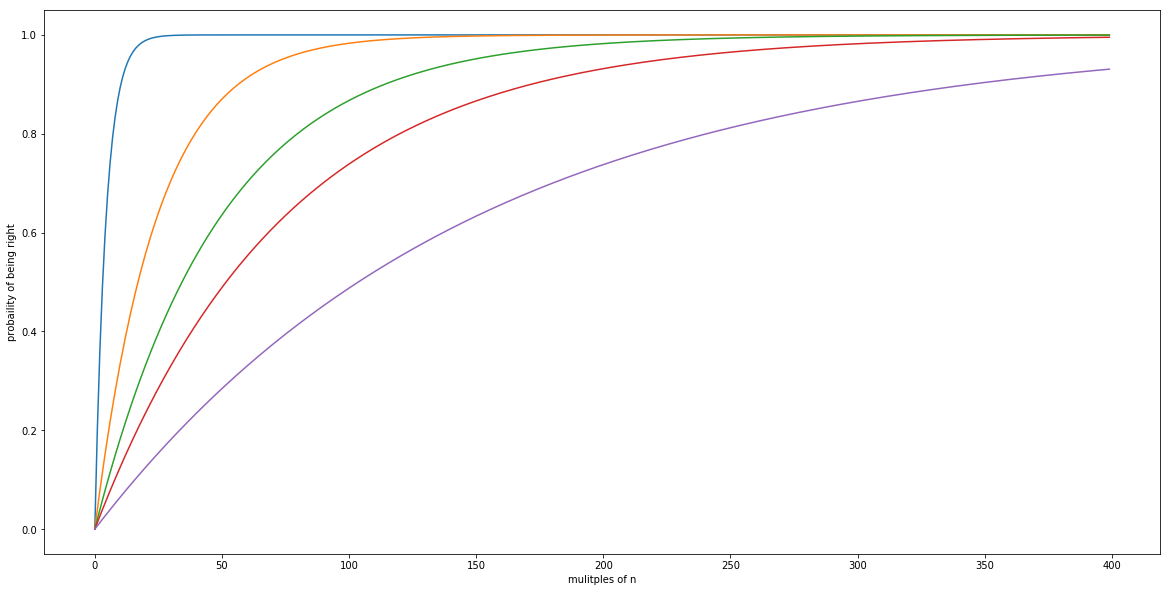

In [6]:
probs = {}
multiple = 400
plt.figure(figsize=(20,10))
for i in [10,50,100,150,300]:
    plt.xlabel("mulitples of n")
    plt.ylabel("probaility of being right")
    probs[i]= []
    for j in range(0,multiple):
        probs[i].append(1-(1-(2/(i*(i-1))))**(i*j))
    plt.plot(probs[i])

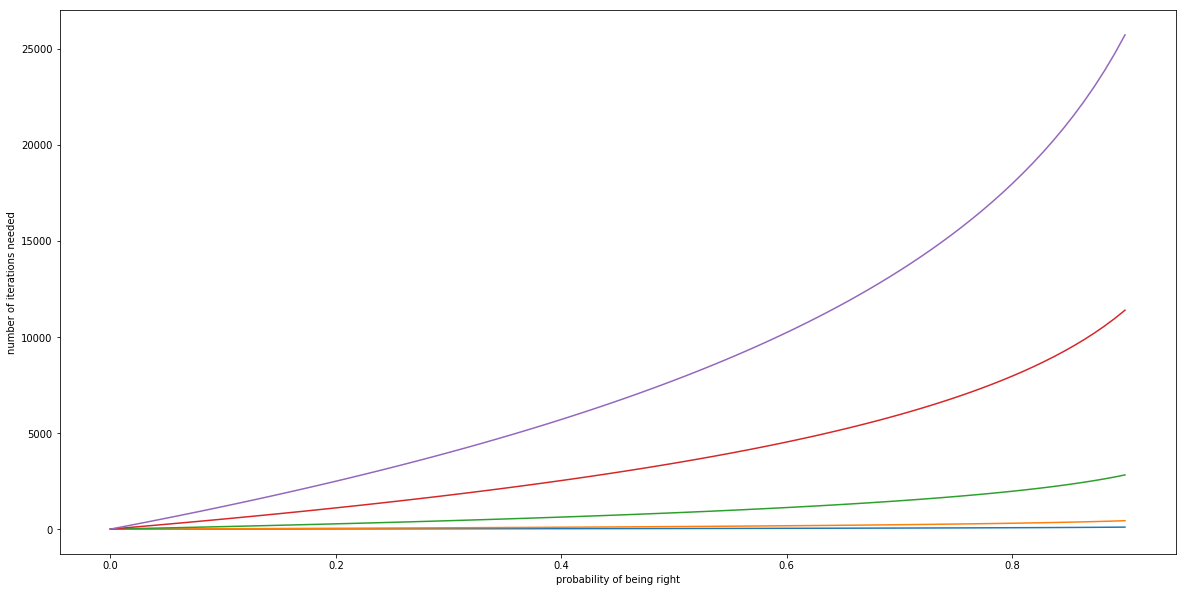

In [13]:
def number_of_iterations_needed(prob, num_nodes):
    return math.log1p(-prob)/math.log1p(-2/(n*(n-1)))

iterations = {}
plt.figure(figsize=(20,10))
for n in [10,20,50,100,150]:
    plt.xlabel("probability of being right")
    plt.ylabel("number of iterations needed")
    iterations[n] = []
    probs = list(np.linspace(0,0.9,100))
    for p in probs:
        iterations[n].append(number_of_iterations_needed(p,n))
    plt.plot(probs, iterations[n])

In [16]:
def number_of_operations_needed(prob, num_nodes):
    return number_of_iterations_needed(prob, num_nodes)* complexity(num_nodes)

In [17]:
def complexity(num_nodes):
    return num_nodes**3

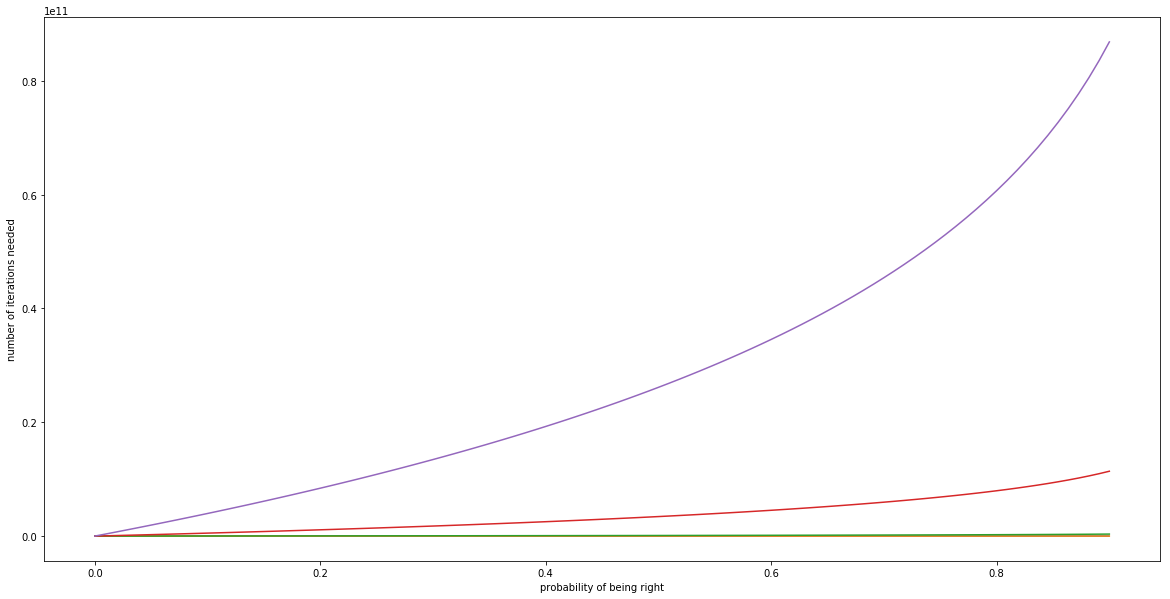

In [18]:
iterations = {}
plt.figure(figsize=(20,10))
for n in [10,20,50,100,150]:
    plt.xlabel("probability of being right")
    plt.ylabel("number of operations needed")
    iterations[n] = []
    probs = list(np.linspace(0,0.9,100))
    for p in probs:
        iterations[n].append(number_of_operations_needed(p,n))
    plt.plot(probs, iterations[n])